# Problem Statement

Customer retention is as crucial as customer acquisition when it comes to increasing revenue. Also we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company. Also churn prediction allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible so we have 3 tasks:

1. Analyze the customer churn rate for bank because it is useful to understand why the customers leave.


2. Predictive behavior modeling i.e. to classify if a customer is going to churn or not.


3. Choose the most reliable model that will attach a probability to the churn to make it easier for customer service to target right customer in order to minimize their efforts to prevent churn.


# Importing Required Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


# Importing the Data

In [2]:

df = pd.read_csv("C:\\Users\\mehak\\Downloads\\Machine learning\\Bank_churn.csv")


In [3]:

df.head()  # Top 5 records


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:

df.tail()   # Bottom 5 records


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Understanding the Data

In [5]:

df.shape


(10000, 14)


There are 10,000 rows and 14 attributes present. Moving forward to Data Pre-processing, attributes that are not necessary for our analysis and modeling will be dropped.


In [6]:

df.columns  


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:

df.info()  # Now let's see the data types of all 14 columns and non-null values present in each


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Unique values in each Column

In [8]:

df.nunique()  


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Null Value Check

In [9]:

df.isna().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No null values present.

### Duplication Check

In [10]:

df[df.duplicated()]


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited




No duplicates present.



### Numerical Columns

In [11]:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Categorical Columns

In [12]:

df.describe(include='object')


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# Pre-Processing of Data

### Dropping insignificant columns

In [13]:

df.drop(columns= ['RowNumber','CustomerId','Surname'],inplace=True)


### Correlation Check

In [14]:

df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


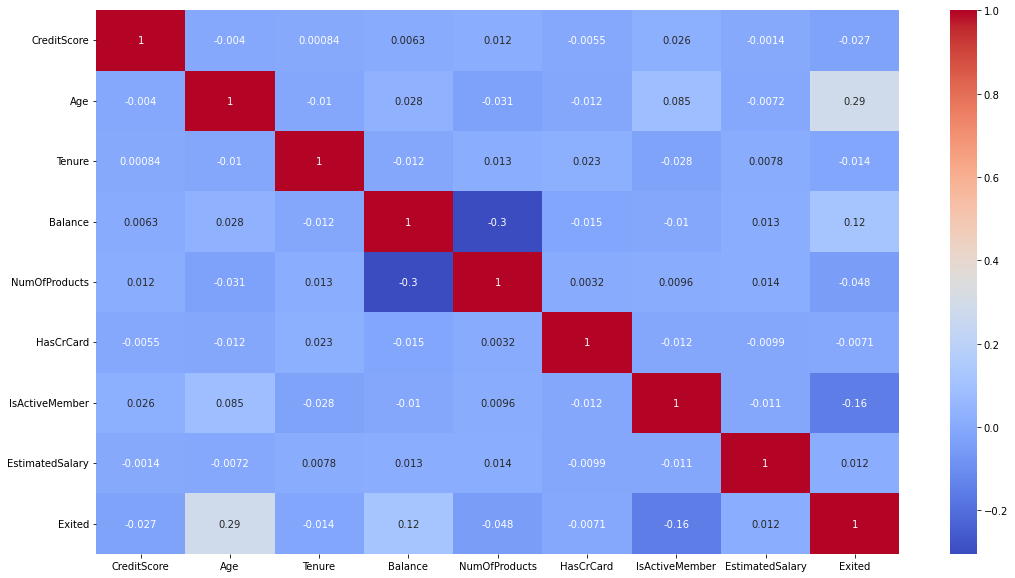

In [15]:

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),yticklabels=True,cbar=True,cmap='coolwarm',annot=True)
plt.show()



No two columns show a correlation greater than 0.75. So as theoretically suggested, we are good to go here.


### Transforming Estimated Salary Column (For EDA)

In [16]:

conditions = [
    (df['EstimatedSalary'] <= 25000),
    (df['EstimatedSalary'] > 25000) & (df['EstimatedSalary'] <= 50000),
    (df['EstimatedSalary'] > 50000) & (df['EstimatedSalary'] <= 75000),
    (df['EstimatedSalary'] > 75000) & (df['EstimatedSalary'] <= 100000),
    (df['EstimatedSalary'] > 100000) & (df['EstimatedSalary'] <= 125000),
    (df['EstimatedSalary'] > 125000) & (df['EstimatedSalary'] <= 150000),
    (df['EstimatedSalary'] > 150000) & (df['EstimatedSalary'] <= 1750000),
    (df['EstimatedSalary'] > 175000) & (df['EstimatedSalary'] <= 200000)
]

values = ['Less than 25000', '25,000-50,000','50,000-75,000','75,000-1,00,000','1,00,000-1,25,000','1,25,000-1,50,000',
          '1,50,000-1,75,000','1,75,000-2,00,000'  ]

df['SalaryRange'] = np.select(conditions, values)


In [17]:

df['SalaryRange'].value_counts()


1,50,000-1,75,000    2455
1,25,000-1,50,000    1279
1,00,000-1,25,000    1276
50,000-75,000        1269
75,000-1,00,000      1268
25,000-50,000        1236
Less than 25000      1217
Name: SalaryRange, dtype: int64

### Transforming Age Column (For EDA)

In [18]:

conditions = [
    (df['Age'] >= 0) & (df['Age'] <= 18),
    (df['Age'] >= 18) & (df['Age'] < 30),
    (df['Age'] >= 30) & (df['Age'] < 40),
    (df['Age'] >= 40) & (df['Age'] < 50),
    (df['Age'] >= 50) & (df['Age'] < 60),
    (df['Age'] >= 60)
]

values = ['Minors', '18-30', '30-40','40-50','50-60','>60']

df['AgeGroup'] = np.select(conditions, values)


In [19]:

df.AgeGroup.value_counts()


30-40     4346
40-50     2618
18-30     1619
50-60      869
>60        526
Minors      22
Name: AgeGroup, dtype: int64

# Univariate Analysis

<Figure size 4320x7200 with 0 Axes>

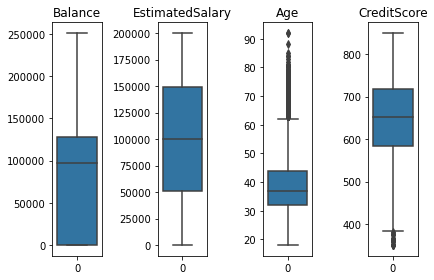

In [20]:

plt.figure(figsize=(60, 100))
# Store the list of columns
columns_to_plot = ['Balance', 'EstimatedSalary', 'Age', 'CreditScore']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df[column], ax=axis) 
        axis.set_title(column)

# Show the plot
plt.tight_layout()
plt.show()


### Age column is skewed.

In [21]:

# Right skewed 
    
df['Age'].skew()      


1.0113202630234552

In [22]:

# Log transformation to handle right skewed data

df['Age1'] = np.log(df['Age']) 


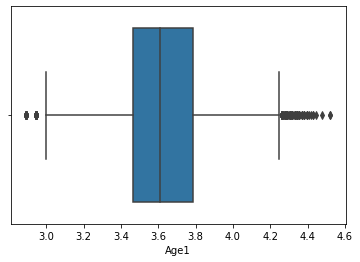

In [23]:

# After log transformation

sns.boxplot(x=df['Age1'])
plt.show()


# Bivariate Analysis

#### Here our main interest is to get an understanding as to how the given attributes relate to the 'Exit' status.

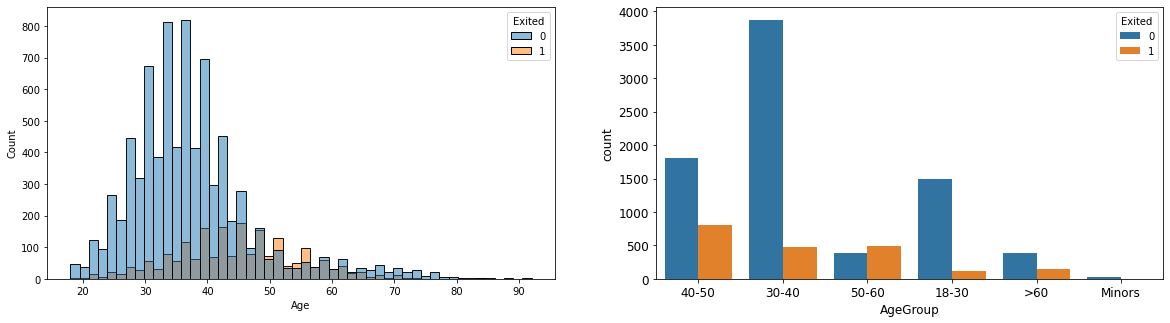

In [24]:

fig, axarr = plt.subplots(1,2, figsize=(20, 5))
plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.histplot(data=df,x='Age',hue='Exited',bins=50,ax=axarr[0])

plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.countplot(data=df,x ='AgeGroup',hue='Exited',ax=axarr[1])
plt.show()


#### Insight: 40-50 is the age group for which churn rate is maximum. Also for age group 50-60 customers churned is more than customer retention.The bank may need to review their target market or review the strategy for retention between the different age groups

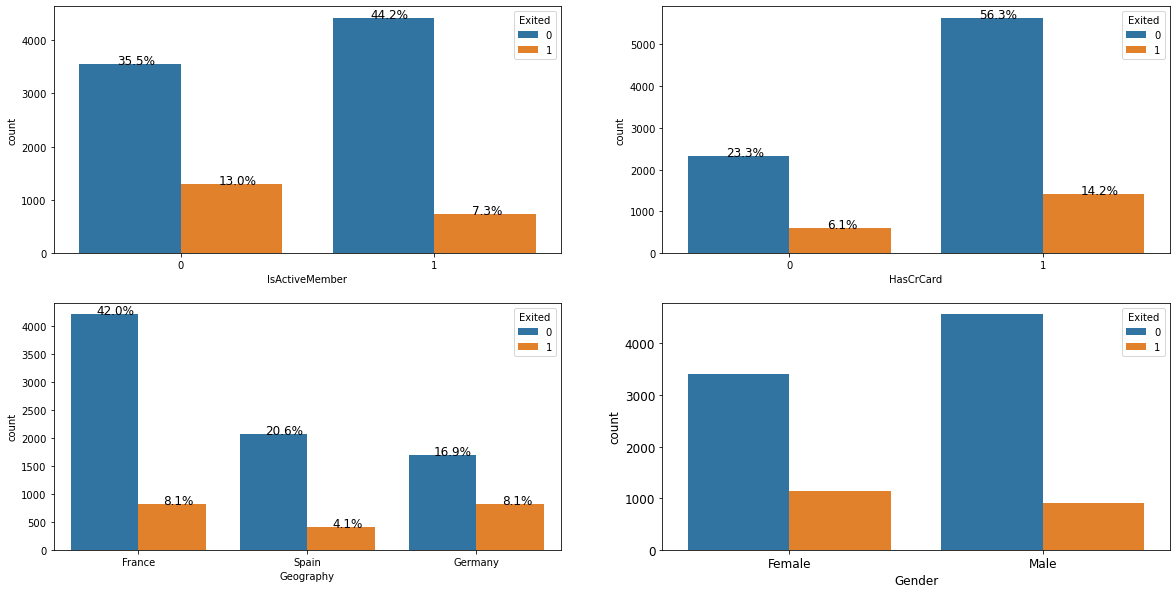

In [25]:

fig, axarr = plt.subplots(2,2, figsize=(20, 10))

plt.xticks(size=12)
plt.xlabel('Is Active Member (Yes/No)',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='IsActiveMember',hue='Exited',ax=axarr[0][0])
total = len(df['IsActiveMember'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

plt.xticks(size=12)
plt.xlabel('Has Credit Card (Yes/No)',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)    
ax = sns.countplot(data=df,x='HasCrCard',hue='Exited',ax=axarr[0][1])    
total = len(df['HasCrCard'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

plt.xticks(size=12)
plt.xlabel('Geography',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='Geography',hue='Exited',ax=axarr[1][0])
total = len(df['Geography'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
    
plt.xticks(size=12)
plt.xlabel('Gender',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)  
sns.countplot(data=df,x='Gender',hue='Exited',ax=axarr[1][1])

plt.show()


### Insights: 

1. Chances of a non-active member churning out is double the chances of an active member churning out. Bank needs to  check with the customers for being inactive , give them some offers plan.

2. Majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

3. Almost half of the customers are from France followed by Spain and Germany each having 25% customers.Hence churn rate is also maximum for France there but Germany showed the same churn rate despite lower count of customers. 

4. Male to female ratio of customers is 5:4.Clearly as observed churn probability is more for a female customer.


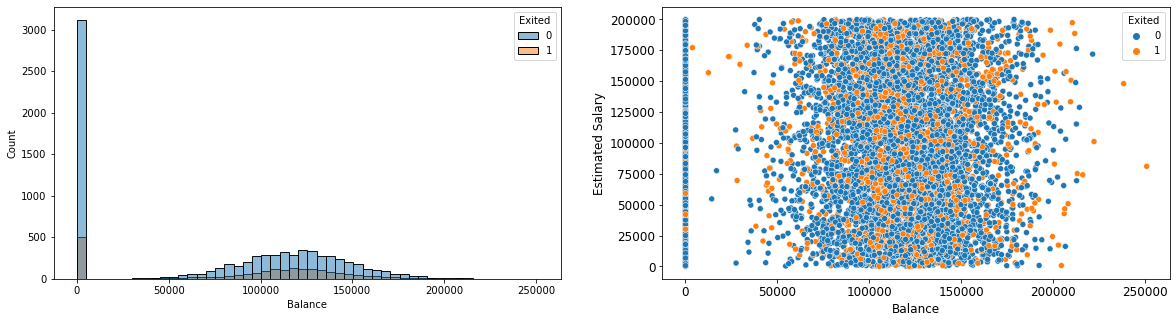

In [26]:

fig, axarr = plt.subplots(1,2, figsize=(20, 5))
plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.histplot(data=df,x='Balance',hue='Exited',bins=50,ax = axarr[0])

plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Estimated Salary',size=12)
sns.scatterplot(data=df,x='Balance',y='EstimatedSalary',hue='Exited',ax=axarr[1])
plt.show()


#### Insights: Probability of customers having zero balance churning out is maximum.Many people keep 0 balance no matter how high or low their estimated salary is.

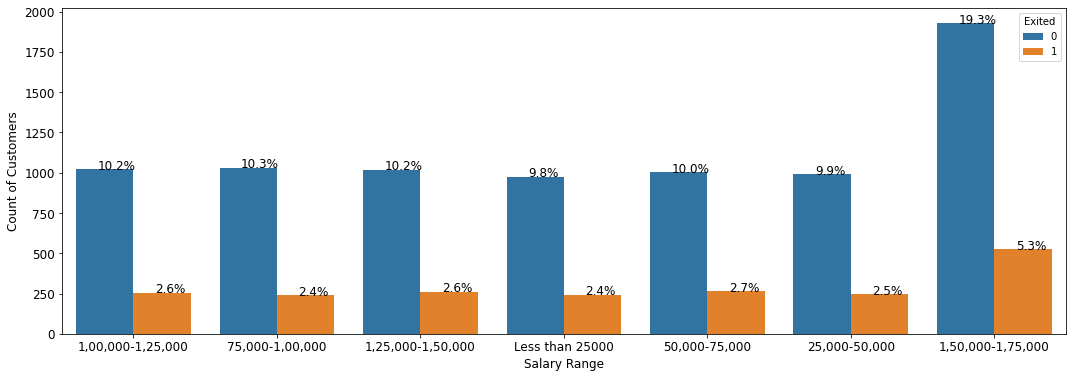

In [27]:

plt.figure(figsize=(18,6))
ax = sns.countplot(data=df,x='SalaryRange',hue='Exited')
plt.xticks(size=12)
plt.xlabel('Salary Range',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
total = len(df['SalaryRange'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
plt.show()


#### Insights: Around one-fourth customers have salary between 150000-175000 and more churn rate for these customers is observed which shows bank is losing it's valuable customers.

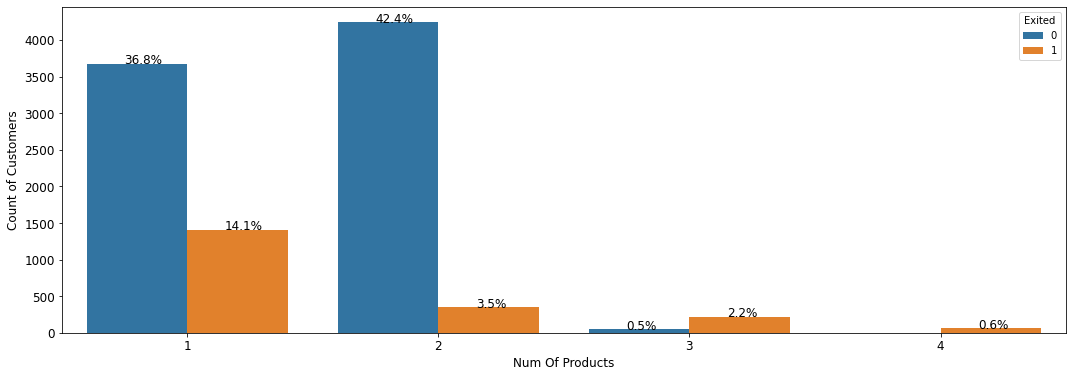

In [28]:

plt.figure(figsize=(18,6))
ax = sns.countplot(data=df,x='NumOfProducts',hue='Exited')
plt.xticks(size=12)
plt.xlabel('Num Of Products',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
total = len(df['NumOfProducts'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
plt.show()


#### Insight: Maximum customers who churned out have used 1 product only (14% out of total 20%). Maybe bank needs to focus on convincing customers to use more of their services and products.

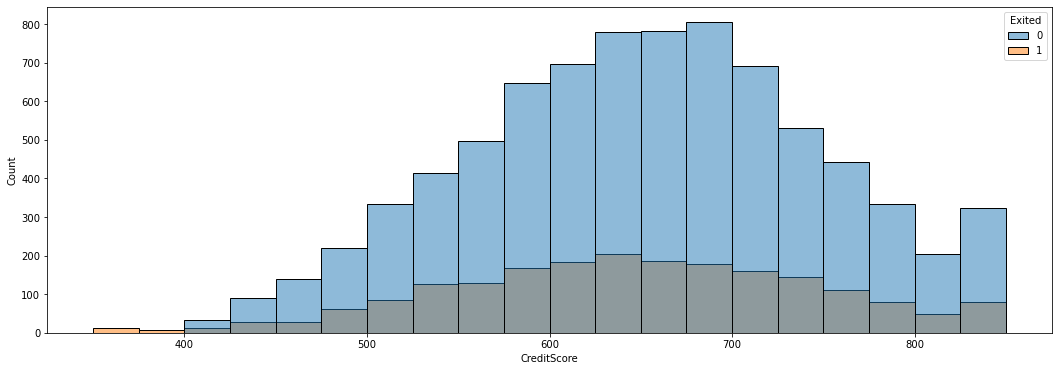

In [29]:

plt.figure(figsize=(18,6))
sns.histplot(data=df,x='CreditScore',bins=20,hue='Exited')
plt.show()


#### There is no significant difference in the credit score distribution between retained and churned customers.

In [30]:

# Drop the columns formed for EDA as it's no longer needed. Also drop age and keep logarithmic values instead(age1)

df.drop(columns=['SalaryRange','AgeGroup','Age'],inplace=True)


# Target check for balanced or Imbalanced data

In [31]:

round(df['Exited'].value_counts()/len(df)*100,2)


0    79.63
1    20.37
Name: Exited, dtype: float64

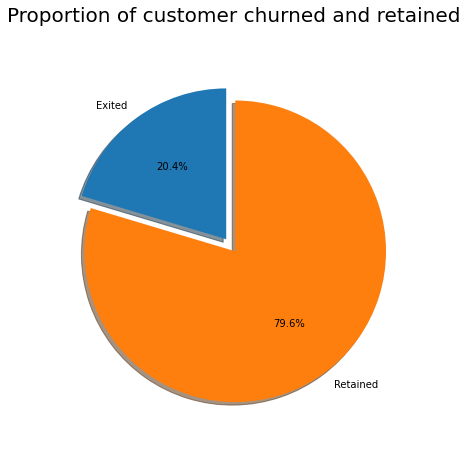

In [32]:

labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6 , 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()


### 80 percent of the data belongs to retained class .It is Imbalanced data .
### Solution : Use SMOTE to handle this or the Precision -Recall curve should be used not accuracy .

# Predictive Behaviour Modeling

### About 20% of the customers have churned. We need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

In [33]:

from sklearn.model_selection import  train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline


In [34]:

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)
print("Shape of X_train:" ,x_train.shape)
print("Shape of X_test:" ,x_test.shape)


Shape of X_train: (8000, 10)
Shape of X_test: (2000, 10)


In [35]:

unique, count = np.unique(y_train ,return_counts= True)
target_org_valuecount= {k:v for (k,v) in zip (unique,count)}
target_org_valuecount


{0: 6384, 1: 1616}

In [36]:

x_test.head()


,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age1
8002,590,Spain,Male,1,0.00,2,0,0,133535.99,3.610918
5438,679,France,Male,7,160515.37,1,1,0,121904.14,3.526361
2369,648,Spain,Female,7,118241.02,1,1,0,172586.89,3.988984
8370,612,France,Male,3,121394.42,1,1,0,164081.42,3.465736
7443,634,France,Female,2,87413.19,1,1,0,63340.65,3.178054


In [37]:

categorical_cols = ['Gender','Geography']


numerical_cols = ['Age1',
                  'Balance',
                  'NumOfProducts',
                  'HasCrCard',
                  'IsActiveMember',
                  'CreditScore',
                  'Tenure',
                  'EstimatedSalary']


## Encoding and Scaling

In [38]:

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


## SMOTE

In [39]:

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=52)


# Logistic Model

In [40]:

logmodel=LogisticRegression()


## Pipeline

In [41]:

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('logmodel', logmodel)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('logmodel', LogisticRegression())])

In [42]:

y_predicted = pipe.predict(x_test)


In [43]:

y_predicted


array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [44]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))


              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1579
           1       0.38      0.67      0.49       421

    accuracy                           0.70      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.78      0.70      0.73      2000



In [45]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))

print("Testing score: ",pipe.score(x_test, y_test))

print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


Training score:  0.713125
Testing score:  0.701
MSE score:  0.299
Accuracy: 0.70
Precision: 0.38
Recall: 0.67
F1-score: 0.49


In [46]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)


array([[1120,  459],
       [ 139,  282]], dtype=int64)

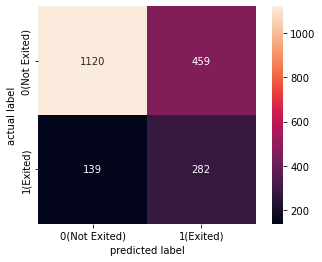

In [47]:

cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()


In [48]:

from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted


array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

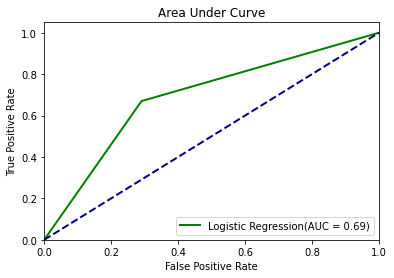

In [49]:

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


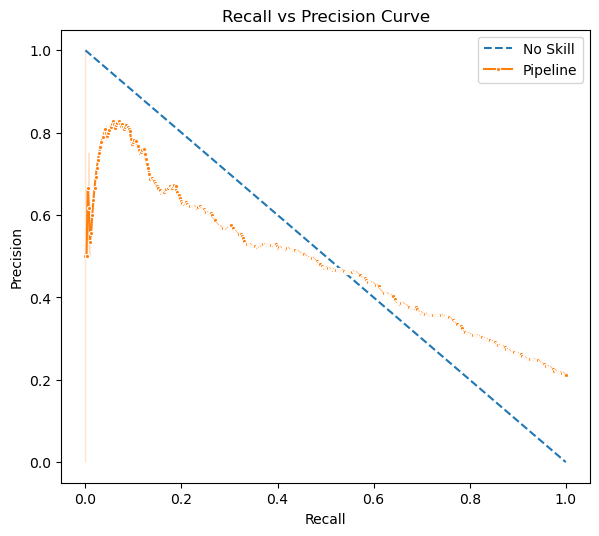

In [50]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve

yhat = pipe.predict_proba(x_test)
precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
plt.figure(dpi=100, figsize=(15, 6))
plt.subplot(121)
sns.lineplot([0, 1], [1, 0], linestyle='--', label='No Skill')
sns.lineplot(recall, precision, marker='.', label=pipe.__class__.__name__)
plt.title("Recall vs Precision Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


In [51]:

col =['Training Score','Testing Score','MSE score','Accuracy','Precision','Recall','F1-Score']

model_log_report1 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Logistic Regression'])


# Hyper Parameter Tuning for Decision Tree Using GridSearch CV

In [52]:

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

x_train['Gender'] = x_train['Gender'].replace({'Male':1,'Female':0})
x_train['Geography'] = x_train['Geography'].replace({'Germany':1,'France':0,'Spain':2})


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def dtree_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = [ {'criterion': ['gini', 'entropy'], # measures split quality          
                   'max_features': ['auto', None], # features considered at splits
                   'max_depth': [5, 6, 8, 10,11],  # max nodes in each tree
                   'min_samples_leaf': [5,8, 10,12, 15], # samples required in each leaf
                   'min_samples_split': [5,10,15,20], # samples required to split node
                    } ]
    
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_


In [56]:

get_par = dtree_grid_search(x_train,y_train,10)
get_par


{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 12,
 'min_samples_split': 15}

# Decision Tree Classifier

In [57]:

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)


In [58]:

decision_tree = DecisionTreeClassifier(random_state=52, max_depth=6, criterion = "entropy",
                                   max_features= None,
                                   min_samples_split=15,
                                   min_samples_leaf=12)


In [59]:

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('decision_tree', decision_tree)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('decision_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_leaf=12,
                                        min_samples_split=15,
                                        random_state=52))])

In [60]:

y_predicted = pipe.predict(x_test)


In [61]:

from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))

print("Testing score: ",pipe.score(x_test, y_test))

print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


Training score:  0.78875
Testing score:  0.7885
MSE score:  0.2115
Accuracy: 0.79
Precision: 0.5
Recall: 0.76
F1-score: 0.60


In [62]:

from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted


array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

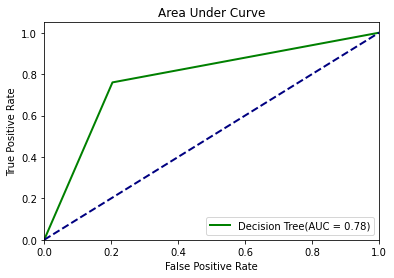

In [63]:

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


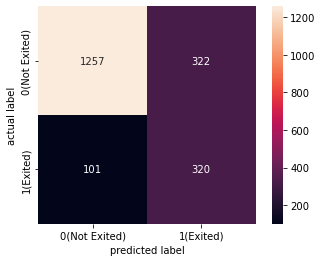

In [64]:

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()


In [65]:

model_log_report2 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Decision Tree'])


# Hyper-parameter Tuning for Random Forest Using GridSearchCV

In [66]:

from sklearn.ensemble import RandomForestClassifier


In [67]:

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

x_train['Gender'] = x_train['Gender'].replace({'Male':1,'Female':0})
x_train['Geography'] = x_train['Geography'].replace({'Germany':1,'France':0,'Spain':2})


In [68]:

def ran_for_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = [ {'criterion': ['gini', 'entropy'], # measures split quality
                   'n_estimators': [50, 100, 200], # number trees to grow           
                   'max_depth': [6, 8, 10],  # max nodes in each tree
                   'min_samples_leaf': [5, 10, 15], # samples required in each leaf
                   'min_samples_split': [5,8,10], # samples required to split node
                    } ]
    
    # random forest model
    rfor_model=RandomForestClassifier()
    
    #use gridsearch to test all values
    rfor_gscv = GridSearchCV(rfor_model, param_grid, cv=nfolds)
    
    #fit model to data
    rfor_gscv.fit(X, y)
    
    return rfor_gscv.best_params_


In [69]:

best_par = ran_for_grid_search(x_train,y_train,10)


In [70]:
best_par

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

# Random Forest Classifier

In [71]:

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)


In [72]:

random_forest = RandomForestClassifier(max_depth=10,
                                       n_estimators = 50, random_state=52,
                                       bootstrap=True,
                                       max_features=None,
                                       min_samples_split=5,
                                       min_samples_leaf=5,
                                       criterion='gini')


In [73]:

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('random_forest', random_forest)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('random_forest',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        min_samples_leaf=5, min_samples_split=5,
                                        n_estimators=50, random_state=52))])

In [74]:

y_predicted = pipe.predict(x_test)


In [75]:

from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))

print("Testing score: ",pipe.score(x_test, y_test))

print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


Training score:  0.873375
Testing score:  0.8295
MSE score:  0.1705
Accuracy: 0.83
Precision: 0.58
Recall: 0.72
F1-score: 0.64


In [76]:

from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted


array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

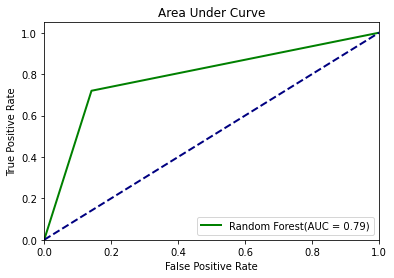

In [77]:

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


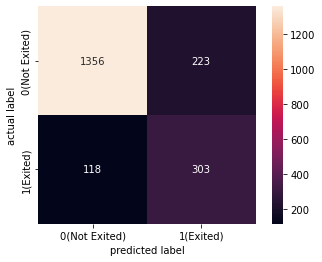

In [78]:

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()


In [79]:

model_log_report3 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Random Forest'])


# Boosting Algorithms

## Hyper parameter tuning using GridSearch CV

In [80]:

import xgboost as xgb

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

x_train['Gender'] = x_train['Gender'].replace({'Male':1,'Female':0})
x_train['Geography'] = x_train['Geography'].replace({'Germany':1,'France':0,'Spain':2})


In [81]:

def xgboost_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = [ {
        'learning_rate': [0.01, 0.1, 0.2], # step size for model iteration
        'reg_lambda': [1, 2], # L2 regularization term; higher=more conservative
        'max_depth': [6, 8], # max number of trees deep
        'gamma': [2, 4], # minimum loss reduction on partitions; higher=more conservative
        'subsample': [0.6, 0.8], # ratio of the training used to grow each tree
        'colsample_bytree': [0.7, 0.9], # ratio of columns when constructing each tree
        'n_estimators': [100, 200,250], # number of trees to grow
                  } ]
    
    # XGboost model
    xgboost_model= xgb.XGBClassifier()
    
    #use gridsearch to test all values
    xgboost_gscv = GridSearchCV(xgboost_model, param_grid, cv=nfolds)
    
    #fit model to data
    xgboost_gscv.fit(X, y)
    
    return xgboost_gscv.best_params_


In [82]:

best_par = xgboost_grid_search(x_train,y_train,10)
best_par


{'colsample_bytree': 0.7,
 'gamma': 2,
 'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 250,
 'reg_lambda': 2,
 'subsample': 0.6}

# XG Boost

In [83]:

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)
                                                    

In [92]:

import xgboost as xgb

xgb = xgb.XGBClassifier(random_state=52, 
                        colsample_bytree= 0.7,
                        gamma= 4,
                        learning_rate= 0.1,
                        max_depth= 6,
                        n_estimators= 100,
                        reg_lambda= 1,
                        subsample= 0.8)


In [93]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('smote', smt),
                             ('xgb', xgb)
                         ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsampl...
                               feature_types=None, gamma=4, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               

In [94]:

y_predicted = pipe.predict(x_test)


In [95]:

from sklearn.metrics import mean_squared_error as MSE

print("Training score: ",pipe.score(x_train, y_train))
print("Testing score: ",pipe.score(x_test, y_test))
print("MSE score: ",MSE(y_test,y_predicted))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


Training score:  0.881625
Testing score:  0.863
MSE score:  0.137
Accuracy: 0.86
Precision: 0.69
Recall: 0.62
F1-score: 0.66


In [96]:

from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted


array([0, 0, 1, ..., 1, 0, 1])

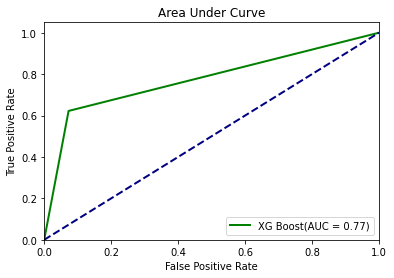

In [97]:

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='XG Boost(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


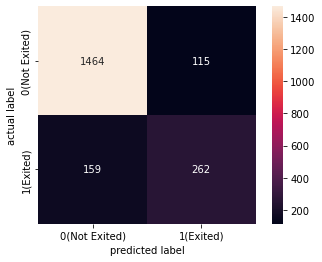

In [98]:

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()


In [99]:

model_log_report4 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Xgboost'])


# Comparing Models

### We need confidence in our positive class predictions (churn) when taking retention actions.

In [100]:

col =['Training Score','Testing Score','MSE score','Accuracy','Precision','Recall','F1-Score']
model_comp = pd.DataFrame(columns=col)
model_comp = pd.concat((model_log_report1,model_log_report2,model_log_report3,model_log_report4))


In [101]:

model_comp


,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.71,0.70,0.30,0.70,0.38,0.67,0.49
Decision Tree,0.79,0.79,0.21,0.79,0.50,0.76,0.60
Random Forest,0.87,0.83,0.17,0.83,0.58,0.72,0.64
Xgboost,0.88,0.86,0.14,0.86,0.69,0.62,0.66
